## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

# Tensorflow libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#matplotlib style
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['legend.frameon'] = False

# project package
from src.plot_functions import plot_acc_loss
from src.training_functions import exp_decay, train_lrscheduler
from src.init_data import create_train_val_data_from_directory


In [2]:
# Create dataset
data_dir = "/home/titou/Documents/git/flower_image_class/data/flower_photos/"
data_dir = pathlib.Path(data_dir)

img_height = 180
img_width = 180
batch_size = 32

train_ds, validation_ds = create_train_val_data_from_directory(data_dir)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2022-07-21 13:13:11.357947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 13:13:11.364400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 13:13:11.364624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 13:13:11.365738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


 SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 13:13:11.759802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5596 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
resnet50 = tf.keras.models.load_model('../data/pretrained_models/resnet50_nopooling.h5')
resnet50.trainable=False

In [4]:
# Create the new model

    
def create_resnet(num_classes):

    model = Sequential([

        layers.Resizing(img_height, img_width),
        layers.Rescaling(1./255),

        resnet50,
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dropout(0.2, seed=123),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])


    opt=tf.keras.optimizers.Adam(learning_rate=1e-3)

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

  

Epoch 1/10


2022-07-21 13:13:18.562852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-07-21 13:13:19.090443: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-21 13:13:19.090849: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-21 13:13:19.090875: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-21 13:13:19.091224: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-21 13:13:19.091248: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


 4/92 [>.............................] - ETA: 4s - loss: 8.9721 - accuracy: 0.3750

2022-07-21 13:13:20.200708: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


92/92 [==============================] - 11s 81ms/step - loss: 1.3601 - accuracy: 0.7466 - val_loss: 0.5412 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 2/10
92/92 [==============================] - 6s 63ms/step - loss: 0.2191 - accuracy: 0.9295 - val_loss: 0.4540 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 3/10
92/92 [==============================] - 6s 64ms/step - loss: 0.0904 - accuracy: 0.9731 - val_loss: 0.4786 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 4/10
92/92 [==============================] - 6s 65ms/step - loss: 0.0447 - accuracy: 0.9874 - val_loss: 0.4868 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 5/10
92/92 [==============================] - 6s 64ms/step - loss: 0.0163 - accuracy: 0.9976 - val_loss: 0.5228 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 6/10
92/92 [==============================] - 6s 63ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.5168 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 7/10
92/92 [==============================] - 6s 63ms/step - loss: 0.0061 - accu

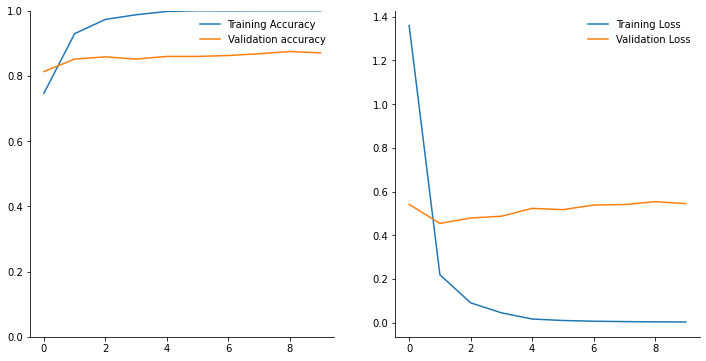

In [5]:
resnet = create_resnet(num_classes)
epochs = 10
resnet_history = train_lrscheduler(resnet, epochs, train_ds, validation_ds, exp_decay)
plot_acc_loss(resnet_history, epochs)

